In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nyc_data=pd.read_csv('C:\\Upx_data\\Project Datasets\\attachment_Project_1_NYC-Flight_data\\Project_1_NYC-Flight data\\flight_data.csv')

In [3]:
nyc_data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [4]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


<ul><li>Most of the columns do not contain complete data,So fill the missing values rather than removing the data because if we remove   the data than we might lose the data in count of thousands</li>
    <li>Delay=actual_timeof_dep_or_arrival-scheduled_timeof_dep_or_arrival</li>
<li>Tailnum is a Object So be careful to substitute with mode or random tail no.</li>
<li>Calculate Air time based on Arrival-departure time and substitute in min</li>
    <li><h2>Note :</h2><strong>All the times are in 24hr format ex:830.0 represent 8:30am and 1304.0 represent 1:04pm</strong></li>
</ul>

<ol>
    <li>To fill the NA values for dept time as it is dependent on scheduled dept time first substitute the delay dept time as avg delay dept time do not take median as the median value can be anything random</li>
    <li>based on delay dept time calculate dept time which is dept_time=delay dept time+sched_dep_time</li>
    <li>For arr time NA value substitution first calculate the arr delay for the existing data as the data has the value for 328063 arrival time but the delay given in data is 327346 for these data.So first calculate the delay for remaining data.</li>
    <li>Once that is done use the same logic to substitute data for arrival time.</li>
    <li>calculate Air time based on formula Arrival time-departure time</li>
    <li>Substitute the tailNum randomly,if we consider the mode to substitute this may increase the every data for single value so distribute the values randamly</li>
    <li><h2>Start asking questions to yourself</h2></li>
</ol>

In [5]:
np.round(nyc_data['dep_delay'].mean())

13.0

In [6]:
nyc_data.loc[nyc_data['dep_delay'].isnull(),'dep_delay']=np.round(nyc_data['dep_delay'].mean())

<b>Write function that adds the values of two series which will be used to add scheduled time and delay.</b><br/>
<b>Since we need to compute time we cannot directly substitute the added value we'll have to split and see if the minutes are exceeding 60 if yes then add 1hr and take the reminder and substitute as minutes.</b>

In [7]:
def addseries(s1,s2):
    return pd.Series(s1)+pd.Series(s2)


In [8]:
s1=nyc_data[nyc_data['dep_time'].isnull()]['sched_dep_time']
s2=nyc_data[nyc_data['dep_time'].isnull()]['dep_delay']

In [9]:
s1.head()

838     1630
839     1935
840     1500
841      600
1777    1540
Name: sched_dep_time, dtype: int64

In [10]:
t1=addseries(s1,s2)
q1,r1=np.divmod(t1,100)

In [11]:
t1.head()

838     1643.0
839     1948.0
840     1513.0
841      613.0
1777    1553.0
dtype: float64

<b>We use below function to check for the minutes>60 if yes add 1hr and put the reminder as minutes.</b>

In [12]:
def addalongrow(v1):
    if v1.r1>=60.0:
        v1.r1=np.mod(v1.r1,60)
        v1.q1=v1.q1+1
    return v1

<b>We concat the series to form DF on which we can apply above function.</b>

In [13]:
q1=pd.Series(q1,name='q1')
r1=pd.Series(r1,name='r1')
df1=pd.concat([q1,r1],axis=1)
df1

,q1,r1
838,16.0,43.0
839,19.0,48.0
840,15.0,13.0
841,6.0,13.0
1777,15.0,53.0
1778,16.0,33.0
1779,13.0,68.0
1780,14.0,33.0
1781,13.0,34.0
1782,15.0,58.0


In [14]:
df1=df1.apply(addalongrow,axis=1)
df1

,q1,r1
838,16.0,43.0
839,19.0,48.0
840,15.0,13.0
841,6.0,13.0
1777,15.0,53.0
1778,16.0,33.0
1779,14.0,8.0
1780,14.0,33.0
1781,13.0,34.0
1782,15.0,58.0


<b>finally substitute the actual computed value.</b>

In [15]:
nyc_data.loc[nyc_data['dep_time'].isnull(),'dep_time']=df1['q1']*100+df1['r1']

In [16]:
nyc_data[nyc_data['dep_delay']>10]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
26,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,01-01-2013 06:00
31,2013,1,1,623.0,610,13.0,920.0,915,5.0,AA,1837,N3EMAA,LGA,MIA,153.0,1096,6,10,01-01-2013 06:00
41,2013,1,1,632.0,608,24.0,740.0,728,12.0,EV,4144,N13553,EWR,IAD,52.0,212,6,8,01-01-2013 06:00
85,2013,1,1,732.0,645,47.0,1011.0,941,30.0,UA,1111,N37456,EWR,MCO,145.0,937,6,45,01-01-2013 06:00
91,2013,1,1,743.0,730,13.0,1107.0,1100,7.0,AA,33,N338AA,JFK,LAX,358.0,2475,7,30,01-01-2013 07:00
93,2013,1,1,743.0,730,13.0,1059.0,1056,3.0,DL,495,N3760C,JFK,SEA,349.0,2422,7,30,01-01-2013 07:00
96,2013,1,1,749.0,710,39.0,939.0,850,49.0,MQ,3737,N508MQ,EWR,ORD,148.0,719,7,10,01-01-2013 07:00
119,2013,1,1,811.0,630,101.0,1047.0,830,137.0,MQ,4576,N531MQ,LGA,CLT,118.0,544,6,30,01-01-2013 06:00
135,2013,1,1,826.0,715,71.0,1136.0,1045,51.0,AA,443,N3GVAA,JFK,MIA,160.0,1089,7,15,01-01-2013 07:00
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,01-01-2013 18:00


<strong>We can see that we have replaced all the null values with proper data for departure</strong>

In [17]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          336776 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


<b>As we can above that we already have arr time for 328063 data and their are 327346 arr delay present so we populate the data for the remaining values</b>
<b>we know that <code>delay=actual time - scheduled time</code> So we calculate and substitute.</b>

In [18]:
ar_time=nyc_data.loc[nyc_data['arr_delay'].isnull(),'arr_time']

In [19]:
nyc_data.loc[nyc_data['arr_delay'].isnull()]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
471,2013,1,1,1525.0,1530,-5.0,1934.0,1805,NaN,MQ,4525,N719MQ,LGA,XNA,NaN,1147,15,30,01-01-2013 15:00
477,2013,1,1,1528.0,1459,29.0,2002.0,1647,NaN,EV,3806,N17108,EWR,STL,NaN,872,14,59,01-01-2013 14:00
615,2013,1,1,1740.0,1745,-5.0,2158.0,2020,NaN,MQ,4413,N739MQ,LGA,XNA,NaN,1147,17,45,01-01-2013 17:00
643,2013,1,1,1807.0,1738,29.0,2251.0,2103,NaN,UA,1228,N31412,EWR,SAN,NaN,2425,17,38,01-01-2013 17:00
725,2013,1,1,1939.0,1840,59.0,29.0,2151,NaN,9E,3325,N905XJ,JFK,DFW,NaN,1391,18,40,01-01-2013 18:00
733,2013,1,1,1952.0,1930,22.0,2358.0,2207,NaN,EV,4333,N11194,EWR,TUL,NaN,1215,19,30,01-01-2013 19:00
754,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,01-01-2013 19:00
838,2013,1,1,1643.0,1630,13.0,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,01-01-2013 16:00
839,2013,1,1,1948.0,1935,13.0,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,01-01-2013 19:00
840,2013,1,1,1513.0,1500,13.0,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,01-01-2013 15:00


In [20]:
sch_time=nyc_data.loc[nyc_data['arr_delay'].isnull(),'sched_arr_time']

In [21]:
ar_time

471       1934.0
477       2002.0
615       2158.0
643       2251.0
725         29.0
733       2358.0
754          NaN
838          NaN
839          NaN
840          NaN
841          NaN
1071      1313.0
1180      1445.0
1604      2333.0
1606      2235.0
1650      2359.0
1714         NaN
1756         NaN
1777         NaN
1778         NaN
1779         NaN
1780         NaN
1781         NaN
1782         NaN
1783         NaN
1784         NaN
2074      1521.0
2212      1821.0
2537      2327.0
2560        19.0
           ...  
332193       NaN
332194       NaN
332671    1923.0
333188       NaN
333189       NaN
333190       NaN
333666    1629.0
334177       NaN
334183       NaN
334184       NaN
334185       NaN
334186       NaN
334197     953.0
334354    1130.0
334412    1344.0
334495    1801.0
334866       NaN
334867       NaN
334868       NaN
335534    2159.0
335780       NaN
335781       NaN
335782       NaN
335805       NaN
336770       NaN
336771       NaN
336772       NaN
336773       N

<b>As we can  see from the above data is inconsistent and we can not use <code>Sub function of pandas.</code>As this would result in generation of huge delay as the scheduled arrival time is huge.</b>
<b>Assuming the arrival delay to be the mean delay for missing values</b>

In [22]:
nyc_data.loc[nyc_data['arr_delay'].isnull(),'arr_delay']=np.int(nyc_data['arr_delay'].mean())

<b>We use the same logic to find arrival time</b>

In [23]:
nyc_data.loc[336751,:]

year                          2013
month                            9
day                             30
dep_time                      2140
sched_dep_time                2140
dep_delay                        0
arr_time                        10
sched_arr_time                  40
arr_delay                      -30
carrier                         AA
flight                         185
tailnum                     N335AA
origin                         JFK
dest                           LAX
air_time                       298
distance                      2475
hour                            21
minute                          40
time_hour         30-09-2013 21:00
Name: 336751, dtype: object

In [24]:
sc_ar_time=nyc_data.loc[nyc_data['arr_time'].isnull(),'sched_arr_time']

In [25]:
arr_del_time=nyc_data.loc[nyc_data['arr_time'].isnull(),'arr_delay']

In [26]:
t2=addseries(sc_ar_time,arr_del_time)
q2,r2=np.divmod(t2,100)

In [27]:
q2=pd.Series(q2,name='q1')
r2=pd.Series(r2,name='r1')
df2=pd.concat([q2,r2],axis=1)


In [28]:
df2=df2.apply(addalongrow,axis=1)


In [29]:
nyc_data.loc[nyc_data['arr_time'].isnull()]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
754,2013,1,1,2016.0,1930,46.0,NaN,2220,6.0,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,01-01-2013 19:00
838,2013,1,1,1643.0,1630,13.0,NaN,1815,6.0,EV,4308,N18120,EWR,RDU,NaN,416,16,30,01-01-2013 16:00
839,2013,1,1,1948.0,1935,13.0,NaN,2240,6.0,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,01-01-2013 19:00
840,2013,1,1,1513.0,1500,13.0,NaN,1825,6.0,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,01-01-2013 15:00
841,2013,1,1,613.0,600,13.0,NaN,901,6.0,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,01-01-2013 06:00
1714,2013,1,2,2041.0,2045,-4.0,NaN,2359,6.0,B6,147,N630JB,JFK,RSW,NaN,1074,20,45,02-01-2013 20:00
1756,2013,1,2,2145.0,2129,16.0,NaN,33,6.0,UA,1299,N12221,EWR,RSW,NaN,1068,21,29,02-01-2013 21:00
1777,2013,1,2,1553.0,1540,13.0,NaN,1747,6.0,EV,4352,N10575,EWR,CVG,NaN,569,15,40,02-01-2013 15:00
1778,2013,1,2,1633.0,1620,13.0,NaN,1746,6.0,EV,4406,N13949,EWR,PIT,NaN,319,16,20,02-01-2013 16:00
1779,2013,1,2,1408.0,1355,13.0,NaN,1459,6.0,EV,4434,N10575,EWR,MHT,NaN,209,13,55,02-01-2013 13:00


In [30]:
nyc_data.loc[nyc_data['arr_time'].isnull(),'arr_time']=df2['q1']*100+df2['r1']

In [31]:
nyc_data.loc[[754,838],:]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
754,2013,1,1,2016.0,1930,46.0,2226.0,2220,6.0,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,01-01-2013 19:00
838,2013,1,1,1643.0,1630,13.0,1821.0,1815,6.0,EV,4308,N18120,EWR,RDU,NaN,416,16,30,01-01-2013 16:00


In [32]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          336776 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null float64
arr_time          336776 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


<strong>Before adding missing values for tail number let's find the air time as we have all the data needed.</strong>
<h3>Be careful as this is time.ex:dept time time 520.0 and arr time 830.0 means the air time to be 193.0 mins not directly substract the time.</h3>

In [33]:
from datetime import datetime,time,date

t1 = time(hour=13, minute=10)
t2 = time(hour=14, minute=30)
arr=datetime.combine(date.min, t2) - datetime.combine(date.min, t1)

In [34]:
arr.total_seconds()/60

80.0

<b>We can use the above datetime and time method to find the air time.</b><br/>
<b>We know the formula <code>a_time=arr_time-dept_time</code></b><br/>
<b>We need to convert the hours to minutes than do the subtraction.</b>

In [35]:
nyc_data['dep_time'].head()

0    517.0
1    533.0
2    542.0
3    544.0
4    554.0
Name: dep_time, dtype: float64

In [36]:
nyc_data[nyc_data['air_time'].isnull()]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
471,2013,1,1,1525.0,1530,-5.0,1934.0,1805,6.0,MQ,4525,N719MQ,LGA,XNA,NaN,1147,15,30,01-01-2013 15:00
477,2013,1,1,1528.0,1459,29.0,2002.0,1647,6.0,EV,3806,N17108,EWR,STL,NaN,872,14,59,01-01-2013 14:00
615,2013,1,1,1740.0,1745,-5.0,2158.0,2020,6.0,MQ,4413,N739MQ,LGA,XNA,NaN,1147,17,45,01-01-2013 17:00
643,2013,1,1,1807.0,1738,29.0,2251.0,2103,6.0,UA,1228,N31412,EWR,SAN,NaN,2425,17,38,01-01-2013 17:00
725,2013,1,1,1939.0,1840,59.0,29.0,2151,6.0,9E,3325,N905XJ,JFK,DFW,NaN,1391,18,40,01-01-2013 18:00
733,2013,1,1,1952.0,1930,22.0,2358.0,2207,6.0,EV,4333,N11194,EWR,TUL,NaN,1215,19,30,01-01-2013 19:00
754,2013,1,1,2016.0,1930,46.0,2226.0,2220,6.0,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,01-01-2013 19:00
838,2013,1,1,1643.0,1630,13.0,1821.0,1815,6.0,EV,4308,N18120,EWR,RDU,NaN,416,16,30,01-01-2013 16:00
839,2013,1,1,1948.0,1935,13.0,2246.0,2240,6.0,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,01-01-2013 19:00
840,2013,1,1,1513.0,1500,13.0,1831.0,1825,6.0,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,01-01-2013 15:00


In [37]:
quo1,rem1=np.divmod(nyc_data.loc[nyc_data['air_time'].isnull(),'arr_time'],100)

In [38]:
def operate(quo,rem):
        return pd.Series.add((quo*60),rem)

In [39]:
quo1[quo1==0]=24

In [40]:
z1=operate(quo1,rem1)

In [41]:
dep_quo1,dep_rem1=np.divmod(nyc_data.loc[nyc_data['air_time'].isnull(),'dep_time'],100)
dep_quo1.head()

471    15.0
477    15.0
615    17.0
643    18.0
725    19.0
Name: dep_time, dtype: float64

In [42]:
dep_quo1[dep_quo1==0]=24

In [43]:
z2=operate(dep_quo1,dep_rem1)

In [44]:
z2[1756]

1305.0

In [45]:
nyc_data.loc[nyc_data['air_time'].isnull(),'air_time']=z1-z2

In [46]:
nyc_data.iloc[[477,471],:]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
477,2013,1,1,1528.0,1459,29.0,2002.0,1647,6.0,EV,3806,N17108,EWR,STL,274.0,872,14,59,01-01-2013 14:00
471,2013,1,1,1525.0,1530,-5.0,1934.0,1805,6.0,MQ,4525,N719MQ,LGA,XNA,249.0,1147,15,30,01-01-2013 15:00


<b>Now we can add the random tailno to the missing values.But it has to be from the tailnum list only.</b>

In [47]:
len(nyc_data['tailnum'].unique())

4044

In [48]:
nyc_data[nyc_data['tailnum'].isnull()].head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1782,2013,1,2,1558.0,1545,13.0,1916.0,1910,6.0,AA,133,NaN,JFK,LAX,198.0,2475,15,45,02-01-2013 15:00
1784,2013,1,2,1614.0,1601,13.0,1741.0,1735,6.0,UA,623,NaN,EWR,ORD,87.0,719,16,1,02-01-2013 16:00
2697,2013,1,3,910.0,857,13.0,1215.0,1209,6.0,UA,714,NaN,EWR,MIA,185.0,1085,8,57,03-01-2013 08:00
2698,2013,1,3,658.0,645,13.0,958.0,952,6.0,UA,719,NaN,EWR,DFW,180.0,1372,6,45,03-01-2013 06:00
3608,2013,1,4,858.0,845,13.0,1021.0,1015,6.0,9E,3405,NaN,JFK,DCA,83.0,213,8,45,04-01-2013 08:00


In [49]:
len(nyc_data[nyc_data['tailnum'].isnull()])

2512

<b>In order to randomly substitute the values we have to use sample function.We need the unique values.</b>

In [50]:
arr_tail=pd.Series(nyc_data.loc[nyc_data['tailnum'].notnull(),'tailnum'].unique()).sample(2512)

In [51]:
nyc_data[nyc_data['tailnum'].isnull()].index

Int64Index([  1782,   1784,   2697,   2698,   3608,   3609,   4332,   6098,
              6997,   7895,
            ...
            330258, 332190, 332191, 333189, 334184, 334186, 334868, 335782,
            336771, 336772],
           dtype='int64', length=2512)

<b>Source and destination indexes should match than only the substitution happens in NA value fields.</b>

In [52]:
arr_tail.index=nyc_data[nyc_data['tailnum'].isnull()].index

In [53]:
arr_tail.head()

1782    N832AY
1784    N8318F
2697    N524AS
2698    N901WN
3608     N3753
dtype: object

In [54]:
nyc_data.loc[nyc_data['tailnum'].isnull(),'tailnum']=arr_tail

In [55]:
nyc_data[nyc_data['tailnum'].isnull()] 

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour


In [56]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          336776 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null float64
arr_time          336776 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           336776 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          336776 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


<b>Now we have all the data we can start with analysis.</b>

<b>Which month has highest departure delay?</b>

In [57]:
bymonthdept=nyc_data.groupby('month',as_index=False)

In [58]:
df1=bymonthdept['dep_delay'].mean()

In [59]:
labels_month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

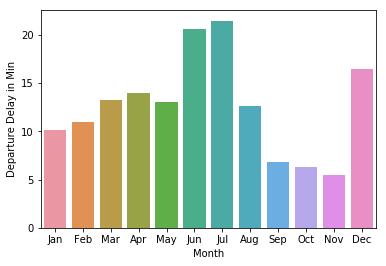

In [60]:
ax=sns.barplot(labels_month,df1['dep_delay'],data=df1)
ax.set(xlabel='Month', ylabel='Departure Delay in Min')
plt.show()

<b>From the above observation we ca see that departure delay is higher in the month of july which is above 20 min on an average.</b>

<b>Which month has least arrival delay?</b>

In [61]:
bymontharr=nyc_data.groupby('month',as_index=False)
df2=bymonthdept['arr_delay'].mean()

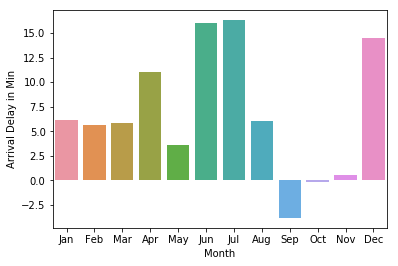

In [62]:
ax=sns.barplot(labels_month,df2['arr_delay'],data=df2)
ax.set(xlabel="Month",ylabel="Arrival Delay in Min")
plt.show()

<b>From the above analysis we can see that Sep month has negative delay.So we are likely to arrive soon...:)</b>

In [63]:
np.unique(nyc_data['origin'])

array(['EWR', 'JFK', 'LGA'], dtype=object)

<b>Which is the most congested airport?</b>

<b>Which is the least congested airport?</b>

In [64]:
by_ori=nyc_data.groupby('origin',as_index=False)

In [65]:
ewr=by_ori.get_group('EWR')

In [66]:
len(np.unique(ewr['dest']))

86

In [67]:
ewr_bydest=ewr.groupby('dest',as_index=False)

In [68]:
df3=ewr_bydest['dep_delay'].mean()

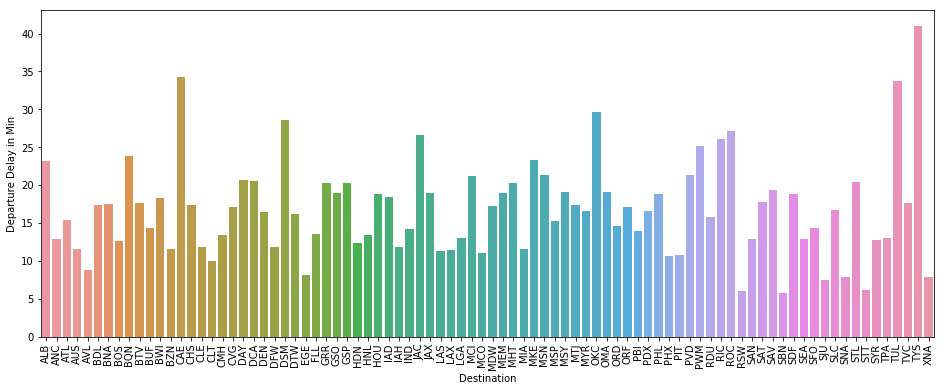

In [69]:
plt.figure(figsize=(16,6))
ax=sns.barplot("dest","dep_delay",data=df3)
ax.set(xlabel="Destination",ylabel="Departure Delay in Min")
plt.xticks(rotation=90)
plt.show()

In [70]:
jfk=by_ori.get_group('JFK')

In [71]:
len(np.unique(jfk['dest']))

70

In [72]:
jfk_bydest=jfk.groupby('dest',as_index=False)

In [73]:
df4=jfk_bydest['dep_delay'].mean()

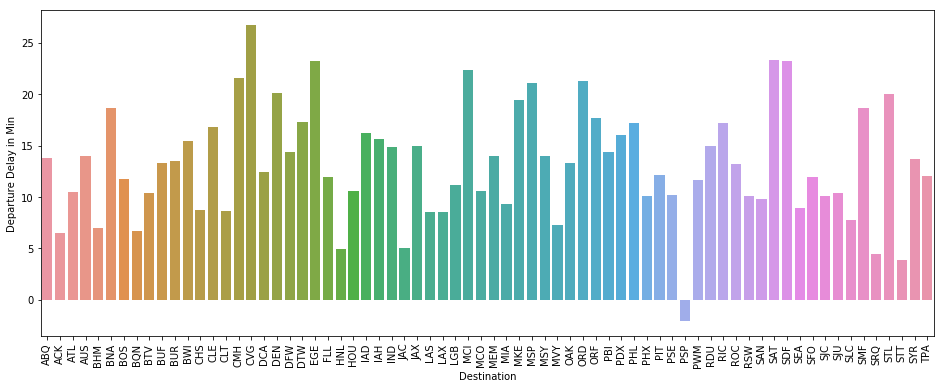

In [74]:
plt.figure(figsize=(16,6))
ax=sns.barplot("dest","dep_delay",data=df4)
ax.set(xlabel="Destination",ylabel="Departure Delay in Min")
plt.xticks(rotation=90)
plt.show()

In [75]:
lga=by_ori.get_group('LGA')

In [76]:
len(np.unique(lga['dest']))

68

In [77]:
lga_bydest=lga.groupby('dest',as_index=False)

In [78]:
df5=lga_bydest['dep_delay'].mean()

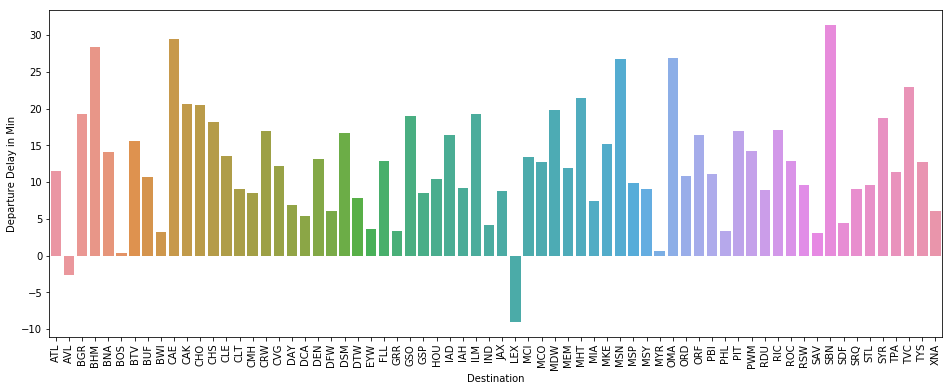

In [79]:
plt.figure(figsize=(16,6))
ax=sns.barplot("dest","dep_delay",data=df5)
ax.set(xlabel="Destination",ylabel="Departure Delay in Min")
plt.xticks(rotation=90)
plt.show()

<b>From the above graphs we can see that <code>LGA</code> has least departure delays.Number of destinations tat can be travelled are 68</b>

<b>From the above graphs we can see that<code>EWR</code>is the most congested airport with 86 flights with min departure daelay of 5min and max dept delay of 40 min </b>

<b></b>

<b>Which are the destinations we can avoid departure delay?</b>

In [80]:
common=np.intersect1d(lga['dest'],ewr['dest'])

In [81]:
common

array(['ATL', 'AVL', 'BNA', 'BOS', 'BTV', 'BUF', 'BWI', 'CAE', 'CHS',
       'CLE', 'CLT', 'CMH', 'CVG', 'DAY', 'DCA', 'DEN', 'DFW', 'DSM',
       'DTW', 'FLL', 'GRR', 'GSO', 'GSP', 'HOU', 'IAD', 'IAH', 'IND',
       'JAX', 'MCI', 'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSN',
       'MSP', 'MSY', 'MYR', 'OMA', 'ORD', 'ORF', 'PBI', 'PHL', 'PIT',
       'PWM', 'RDU', 'RIC', 'ROC', 'RSW', 'SAV', 'SBN', 'SDF', 'STL',
       'SYR', 'TPA', 'TVC', 'TYS', 'XNA'], dtype=object)

<b>Since LGA has least delay when we see the common destination between LGA and EWR we see these destinations.We can avoid to delay for above destinations.</b>

<b>Which carrier has least departure and arrival delay?</b>

In [82]:
by_carrier=nyc_data.groupby('carrier',as_index=False)

In [83]:
bycarrdepdelay=by_carrier['dep_delay'].mean()

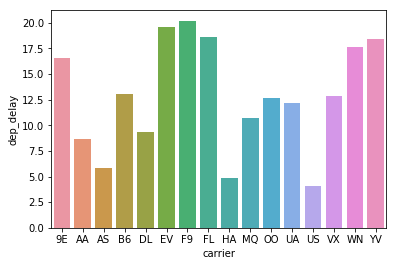

In [84]:
sns.barplot('carrier','dep_delay',data=bycarrdepdelay)

<b><code>US</code> has the least departure delay which is less that 5 min in average and <code>F9</code> has highest delay around 20 min on an average</b>

In [85]:
bycarrarrdelay=by_carrier['arr_delay'].mean()

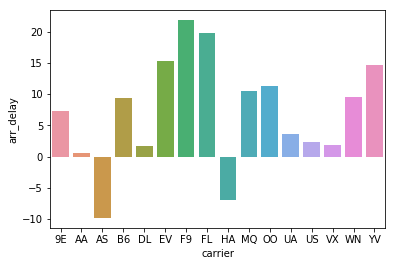

In [86]:
sns.barplot('carrier','arr_delay',data=bycarrarrdelay)

<b><code>AS</code> has negative arrival delay which means we'll arrive before the scheduled time.</b>

In [87]:
flightsheaded=nyc_data.groupby('dest',as_index=False)['flight'].count()

In [88]:
flightsheaded[flightsheaded['flight']==flightsheaded['flight'].max()]

,dest,flight
69,ORD,17283


<b>17283 flights went to destination ORD in the year 2013</b>

In [89]:
flightsheaded[flightsheaded['flight']==flightsheaded['flight'].min()]

,dest,flight
50,LEX,1
51,LGA,1


<b> destination LEX and LGA have single flight in entire year</b>

In [90]:
nyc_data[nyc_data['dest']=='LEX']

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
77948,2013,11,24,2026.0,2035,-9.0,2227.0,2249,-22.0,9E,3669,N8604C,LGA,LEX,90.0,604,20,35,24-11-2013 20:00


In [91]:
nyc_data[nyc_data['dest']=='LGA']

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
275945,2013,7,27,119.0,106,13.0,251.0,245,6.0,US,1632,N334JB,EWR,LGA,92.0,17,1,6,27-07-2013 01:00
